In [1]:
%config Completer.use_jedi = False

In [2]:
# 한글폰트 지정
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family='gulim')

In [3]:
import pandas as pd
df = pd.read_csv('./itworld_news_preprocessing.csv')
df.head()

,topic,title,text
0,퍼스널 컴퓨팅,구글 8월부터 윈도우 8·81용 구글 드라이브 지원 중단,마이크로소프트가 지난 2016년 윈도우 8 지원을 종료하고 올해 초 윈도우 81에 ...
1,퍼스널 컴퓨팅,글로벌 칼럼ㅣ애플의 야심 찬 비전 프로 지울 수 없는 홀로렌즈라는 기시감,허공에 고정할 수 있는 창부터 3차원 공룡 화상통화 땅에서 솟아오르는 3D 성까지 ...
2,퍼스널 컴퓨팅,글로벌 칼럼ㅣWWDC의 진정한 주인공은 애플 실리콘이다,WWDC의 진정한 주인공은 여전히 애플 실리콘이다 비전 프로 헤드셋이 가장 많은 관...
3,퍼스널 컴퓨팅,얽히고 설킨 케이블과의 전쟁⋯2023 PC 하드웨어 최신 트렌드,데스크톱 PC를 조립할 때 가장 번거로운 부분은 무엇일까 부품의 호환성 확인 비싼 ...
4,퍼스널 컴퓨팅,인텔 11세대 타이거 레이크 연내 단종 여름 이후 할인 폭 클 듯,11세대 타이거 레이크 프로세서가 단종되고 남은 물량은 연내 할인 판매 등으로 소진...


In [97]:
df['topic'].unique()

array(['퍼스널 컴퓨팅', '디지털 디바이스', 'IoT', '윈도우', '게임', '보안', '스마트폰', '미래기술',
       '개발자', '글로벌 트렌드', '데이터센터', 'VRㆍAR', '오픈소스', '기업 문화', '블록체인',
       'AIㆍML', '스토리지', 'IT 관리', '모바일', '애플리케이션', '오피스ㆍ협업', 'iOS',
       '데이터ㆍ분석', '클라우드', '가상화ㆍ컨테이너', '네트워크', '맥OS'], dtype=object)

In [233]:
# 실습용 토픽 3
new_df = df[(df['topic'] == '블록체인') | (df['topic'] == '클라우드') | (df['topic'] == '가상화ㆍ컨테이너')].reset_index()
del new_df['index']
new_df.head()

,topic,title,text
0,블록체인,소버린월렛 국제결제은행 핸드북 발행 참여… 메타무이 기술력 인정받아,소버린월렛이 국제결제은행BIS 혁신허브북유럽센터Innovation Hub Nordi...
1,블록체인,리플 CBDC 플랫폼 출시··· CBDC 및 스테이블코인 발행 지원,리플이 중앙은행 정부 및 금융 기관이 자체 중앙은행디지털화폐CBDC를 원활하게 발행...
2,블록체인,리플 디지털 자산 커스터디 업체 메타코 2억5000만 달러에 인수,리플이 스위스의 디지털 자산 커스터디 및 토큰화 기술 업체 메타코를 인수했다고 5월...
3,블록체인,가상자산 세금 서비스 크립토택스 빗썸·코빗 등 국내 대형 거래소와 협력,더블엑스소프트에 따르면 가상자산 세금 서비스 플랫폼 크립토택스가 국내 가상자산 거래...
4,블록체인,토큰증권 시대를 준비하라 KISA 블록체인 밋업 컨퍼런스 4월 5일 개최,한국인터넷진흥원KISA이 과학기술정보통신부와 함께 토큰증권 시대 블록체인의 역할을 ...


## 자연어 처리
- 불용어 정의
- 합성어 등 사용자 사전 추가
- 명사 추출

In [221]:
# https://www.ranks.nl/stopwords/korean
# 불용어 정의
stopwords_df = pd.read_csv('./stopwords.csv', encoding='cp949',usecols=[0])

row = ['은', '는', '이', '가', '을', '를', '들', '의', '것', '좀', '잘', '도', '으로','위해',
       '만일','다시','에', '수', '및', '등', '듯', '개', '이상', '그', '때', '몇몇','대한',
       '지난','통해','반드시','한편','만일','얼마','다른','지난','올해','내년','도록','이제',
       '위해','항상','확인','예전','간단','지금','필자','당시','충분','이론','대신','보통',
       '힘껏','더욱','원활','측은','현재','매일'
      ]
row_df = pd.DataFrame(row, columns=['stopwords'])

new_stopwords = stopwords_df.append(row_df, ignore_index=True)
stopwords = list(set(new_stopwords['stopwords']))   # 중복 제거 후 고유 요소만 남김
print(len(stopwords))

629


In [222]:
# 사용자 사전 정의
add_dic = ['홀로렌즈', '메타버스', '테크핀', '인슈어테크', '딥페이크', '스미싱', '프로슈머', '마이데이터', 'DB','AI','AR','VR',
           '메가픽셀', '홀로그램', '지오펜싱', '핀테크', '해커톤','디지털트윈', '디지털화폐', '사물정보통신','디지털화폐', 'IT',
           '웹3.0', '인공지능', '큐브위성', '클라우드', '화이트박스', '인플레이션', '블록체인','상호운용성', '증강현실',
           '머신러닝','딥러닝','자율주행','데이터레이크','인플레이스']

In [223]:
from tqdm import tqdm
from ckonlpy.tag import Twitter
import regex as re

def tokenizer_twitter(documents, stopword=stopwords, user_dict=add_dic):
    twitter = Twitter()
    twitter.add_dictionary(user_dict, 'Noun')
    
#     tokenized_data = []
#     for doc in tqdm(documents):
    new_doc = re.sub(r'[^가-힣\s]', '', documents) # 한글 외 문자 제거
    tokenized_doc = [noun for noun in twitter.nouns(new_doc) if len(noun) >= 3] # 3글자 미만 제거
    stopwords_removed_doc = [word for word in tokenized_doc if not word in stopword] # 불용어 제거
#         tokenized_data.append(stopwords_removed_doc)
        
    return(stopwords_removed_doc)
        
# tokenizer_twitter(new_df['text'])

## 탐색
- TF-IDF

In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(
    tokenizer=tokenizer_twitter, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df=1,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf=True    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
) # 6-


X = vectorize.fit_transform(new_df['text'])
X.toarray()

C:\Users\heo\AppData\Roaming\Python\Python37\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.35632578, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [225]:
# Term Freqeuncy
tfidf = pd.DataFrame(X.toarray(), columns = vectorize.get_feature_names_out())
tfidf.head()

,가격표,가금류,가까이,가능성,가다가,가독성,가드레일,가디언,가뜩이나,가라지,...,희소식,희토류,히긴스,히드라,히라노,히스토리,히어로,히타치,힐러리,힙스터
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [226]:
# Document Frequency 
freq = tfidf.astype(bool).sum(axis = 0)
freq

가격표       5
가금류       2
가까이      23
가능성     221
가다가       1
       ... 
히스토리      1
히어로       3
히타치       6
힐러리       1
힙스터       1
Length: 4630, dtype: int64

In [239]:
words=[]
for i in range(len(freq)):
    if freq.values[i] >= 200 :
        words.append(freq.index[i])
        
tfidf[words]

,가능성,개발자,글로벌,네트워크,대부분,데이터,디지털,블록체인,비즈니스,사용자,...,자동화,최적화,컨테이너,컴퓨팅,클라우드,파트너,퍼블릭,프로세스,프로젝트,플랫폼
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.098879,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.143454,0.041739
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.218048,0.076122,0.000000,0.164327,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.090266,0.000000,0.160273
2,0.0,0.000000,0.080980,0.000000,0.0,0.000000,0.111855,0.142583,0.103686,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.094793
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.158692,0.283960,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,0.0,0.000000,0.264152,0.000000,0.0,0.000000,0.000000,0.000000,0.199754,0.000000,...,0.000000,0.000000,0.0,0.000000,0.150546,0.0,0.0,0.000000,0.000000,0.000000
1074,0.0,0.059458,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.081442,...,0.060696,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1075,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.083267,...,0.000000,0.228281,0.0,0.000000,0.062525,0.0,0.0,0.000000,0.000000,0.000000
1076,0.0,0.000000,0.000000,0.058219,0.0,0.098582,0.058601,0.000000,0.054321,0.000000,...,0.116483,0.071223,0.0,0.064973,0.097694,0.0,0.0,0.071466,0.000000,0.043074


리뷰의 최대 길이 : 7726
리뷰의 평균 길이 : 1911.5380333951762


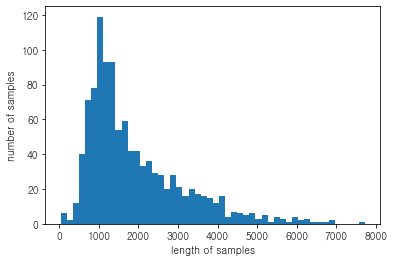

In [228]:
# 리뷰 길이 분포 확인
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(review) for review in new_df['text']))
print('리뷰의 평균 길이 :',sum(map(len, new_df['text']))/len(new_df['text']))
plt.hist([len(review) for review in new_df['text']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 군집화

In [242]:
# Create a mapping dictionary
mapping = {'블록체인': 0, '가상화ㆍ컨테이너': 1, '클라우드': 2}

# Map values in 'topic' column to numerical values
new_df['new_topic'] = new_df['topic'].map(mapping)
new_df.head()

,topic,title,text,new_topic,cluster_label
0,블록체인,소버린월렛 국제결제은행 핸드북 발행 참여… 메타무이 기술력 인정받아,소버린월렛이 국제결제은행BIS 혁신허브북유럽센터Innovation Hub Nordi...,0,0
1,블록체인,리플 CBDC 플랫폼 출시··· CBDC 및 스테이블코인 발행 지원,리플이 중앙은행 정부 및 금융 기관이 자체 중앙은행디지털화폐CBDC를 원활하게 발행...,0,0
2,블록체인,리플 디지털 자산 커스터디 업체 메타코 2억5000만 달러에 인수,리플이 스위스의 디지털 자산 커스터디 및 토큰화 기술 업체 메타코를 인수했다고 5월...,0,0
3,블록체인,가상자산 세금 서비스 크립토택스 빗썸·코빗 등 국내 대형 거래소와 협력,더블엑스소프트에 따르면 가상자산 세금 서비스 플랫폼 크립토택스가 국내 가상자산 거래...,0,0
4,블록체인,토큰증권 시대를 준비하라 KISA 블록체인 밋업 컨퍼런스 4월 5일 개최,한국인터넷진흥원KISA이 과학기술정보통신부와 함께 토큰증권 시대 블록체인의 역할을 ...,0,0


In [243]:
from sklearn.cluster import KMeans

kmeans  = KMeans(n_clusters=3, max_iter=10000, random_state=23)

cluster_label = kmeans.fit_predict(X)

new_df['cluster_label'] = cluster_label
new_df

,topic,title,text,new_topic,cluster_label
0,블록체인,소버린월렛 국제결제은행 핸드북 발행 참여… 메타무이 기술력 인정받아,소버린월렛이 국제결제은행BIS 혁신허브북유럽센터Innovation Hub Nordi...,0,0
1,블록체인,리플 CBDC 플랫폼 출시··· CBDC 및 스테이블코인 발행 지원,리플이 중앙은행 정부 및 금융 기관이 자체 중앙은행디지털화폐CBDC를 원활하게 발행...,0,0
2,블록체인,리플 디지털 자산 커스터디 업체 메타코 2억5000만 달러에 인수,리플이 스위스의 디지털 자산 커스터디 및 토큰화 기술 업체 메타코를 인수했다고 5월...,0,0
3,블록체인,가상자산 세금 서비스 크립토택스 빗썸·코빗 등 국내 대형 거래소와 협력,더블엑스소프트에 따르면 가상자산 세금 서비스 플랫폼 크립토택스가 국내 가상자산 거래...,0,0
4,블록체인,토큰증권 시대를 준비하라 KISA 블록체인 밋업 컨퍼런스 4월 5일 개최,한국인터넷진흥원KISA이 과학기술정보통신부와 함께 토큰증권 시대 블록체인의 역할을 ...,0,0
...,...,...,...,...,...
1073,가상화ㆍ컨테이너,VM웨어 2016년 2분기 실적 지난해 비해 11% 증가,VM웨어는 2016년 2분기 글로벌 실적을 발표했다\rVM웨어의 2016년 2분기 ...,1,2
1074,가상화ㆍ컨테이너,첫인상 버추얼 박스 51 APIC 개선으로 윈도우 성능 대폭 향상,오라클이 지난 주 오픈소스 데스크톱 가상화 앱인 버추얼박스VirtualBox 51의...,1,2
1075,가상화ㆍ컨테이너,이트론 전국대학교에 가상화 솔루션 무상 프로모션 진행,이트론wwwe-tronscokr은 자체 기술로 개발된 VDI데스크톱가상화 솔루션인 ...,1,2
1076,가상화ㆍ컨테이너,HDS 컨버지드 솔루션 UCP 2000 및 UCP HC V240 발표,히타치 데이터 시스템즈Hitachi Data Systems 이하 HDS가 중소 중견...,1,2


In [236]:
new_df['cluster_label'].unique()

array([0, 2, 1])

In [244]:
# 문서 단어별 클러스터 중심 확인
cluster_centers = kmeans.cluster_centers_
print(cluster_centers.shape)
print(cluster_centers)

(3, 4630)
[[0.00026903 0.00067461 0.00123161 ... 0.         0.         0.        ]
 [0.00264469 0.         0.00340472 ... 0.         0.         0.00127765]
 [0.00050773 0.         0.00393223 ... 0.00276648 0.0002789  0.        ]]


In [202]:
# 클러스터간 핵심 단어 추출
def get_cluster_details(cluster_model, cluster_data, feature_name, cluster_num, top_n_features=10):
    cluster_details={}
    center_feature_idx = cluster_model.cluster_centers_.argsort()[:,::-1]
    
    for cluster_num in range(cluster_num):
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
        
        top_idx = center_feature_idx[cluster_num, :top_n_features]
        top = [feature_name[idx] for idx in top_idx]
        top_val = cluster_model.cluster_centers_[cluster_num, top_idx].tolist()
        
        cluster_details[cluster_num]['top_features'] = top
        cluster_details[cluster_num]['top_features_value'] = top_val
        
        filenames = cluster_data[cluster_data['cluster_label']==cluster_num]['title']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['title'] = filenames
        
    return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print(f"### Cluster Num: {cluster_num}")
        print()
        print("상위 10개 feature 단어:\n", cluster_detail['top_features'])
        print()
        print(f"Cluster {cluster_num}으로 분류된 문서들:\n {cluster_detail['title'][:5]}")
        print('-'*20)

In [245]:
feature_names = vectorize.get_feature_names()
cluster_details = get_cluster_details(cluster_model=kmeans,
                                     cluster_data=new_df,
                                     feature_name=feature_names,
                                     cluster_num=3,
                                     top_n_features=10)
print_cluster_details(cluster_details)

### Cluster Num: 0

상위 10개 feature 단어:
 ['블록체인', '서비스', '플랫폼', '네트워크', '디지털', '데이터', '비트코인', '시스템', '사용자', '프로젝트']

Cluster 0으로 분류된 문서들:
 ['소버린월렛 국제결제은행 핸드북 발행 참여… 메타무이 기술력 인정받아 ', '리플 CBDC 플랫폼 출시··· CBDC 및 스테이블코인 발행 지원', '리플 디지털 자산 커스터디 업체 메타코 2억5000만 달러에 인수', '가상자산 세금 서비스 크립토택스 빗썸·코빗 등 국내 대형 거래소와 협력', '토큰증권 시대를 준비하라 KISA 블록체인 밋업 컨퍼런스 4월 5일 개최']
--------------------
### Cluster Num: 1

상위 10개 feature 단어:
 ['컨테이너', '애플리케이션', '클라우드', '개발자', '서비스', '오케스트', '클러스터', '플랫폼', '리눅스', '네이티']

Cluster 1으로 분류된 문서들:
 ['글로벌 칼럼 | 페더레이티드 멀티클라우드 애플리케이션의 잠재력과 필수 고려사항', '애플리케이션 현대화 자동화 지원 外 킨드릴 레드햇 오픈시프트용 신규 서비스와 기능 공개', '뉴타닉스 닷넥스트 2023서 신규 솔루션 및 서비스 공개', '글로벌 칼럼 | 페더레이티드 멀티클라우드 애플리케이션의 잠재력과 필수 고려사항', '쿠버네티스에 핀옵스 더하기 오픈코스트 활용한 비용 관리법']
--------------------
### Cluster Num: 2

상위 10개 feature 단어:
 ['클라우드', '데이터', '서비스', '솔루션', '애플리케이션', '비즈니스', '인프라', '시스템', '플랫폼', '소프트웨어']

Cluster 2으로 분류된 문서들:
 ['블로그 | 당신이 클라우드 최적화 프로젝트에서 놓친 것', '논란 격화되는 마이크로소프트 클라우드 관행…EU 위원회 조사 임박', '몰로코-버거킹 협업 사례 공개… 몰로코 클라우드 DSP 도입으

C:\ProgramData\Anaconda3\envs\intown\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [246]:
cluster_details

{0: {'cluster': 0,
  'top_features': ['블록체인',
   '서비스',
   '플랫폼',
   '네트워크',
   '디지털',
   '데이터',
   '비트코인',
   '시스템',
   '사용자',
   '프로젝트'],
  'top_features_value': [0.15145319578798244,
   0.05127649471761363,
   0.044471238268436734,
   0.041963895924954586,
   0.041887974106331737,
   0.03947545065739766,
   0.03745406946317472,
   0.034507053539350005,
   0.033074507240871465,
   0.032990426825401396],
  'title': ['소버린월렛 국제결제은행 핸드북 발행 참여… 메타무이 기술력 인정받아 ',
   '리플 CBDC 플랫폼 출시··· CBDC 및 스테이블코인 발행 지원',
   '리플 디지털 자산 커스터디 업체 메타코 2억5000만 달러에 인수',
   '가상자산 세금 서비스 크립토택스 빗썸·코빗 등 국내 대형 거래소와 협력',
   '토큰증권 시대를 준비하라 KISA 블록체인 밋업 컨퍼런스 4월 5일 개최',
   '카카오엔터프라이즈 블록체인 플랫폼으로 토큰증권 시대 구현한다',
   '신세계아이앤씨 소매업 특화된 스파로스 NFT 출시',
   '2130억 달러 오가는 쩐의 전쟁 중앙은행 디지털 화폐CBDC의 현황과 전망',
   '국내 M2E 프로젝트 첫 사례 만보기 앱 슈퍼워크 빗썸 상장',
   '엔터플-윈클 로우코드 탄소 배출권 관련 모듈 공동 개발 나선다',
   '라인 넥스트 도시 월렛 및 라인 비트맥스 월렛 통합… 전 세계 360만 명 유저 확보',
   '라인 자체 암호자산 링크 빗썸에 상장',
   '블록체인 기업 아이콘루프 파라메타로 사명 변경웹3 트랜스포메이션 비즈니스 확대',
   'KISA-헥슬란트 2023년 안전

## 문서간 유사도
- 참고: https://techblog-history-younghunjo1.tistory.com/114

In [249]:
# 클러스터링 된 문서들 중 특정 문서 선택 후 비슷한 문서 추출
from sklearn.metrics.pairwise import cosine_similarity

block_idx = new_df[new_df['cluster_label']==0].index
print("블록체인 카테고리로 클러스터링된 문서들의 인덱스\n", block_idx)
print()

comparison_doc = new_df.iloc[block_idx[0]]['title']
print("## 유사도 비교 기준 문서 이름:", comparison_doc)
print()

similarity = cosine_similarity(X[block_idx[0]], X[block_idx])
print(similarity)

블록체인 카테고리로 클러스터링된 문서들의 인덱스
 Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1037, 1038, 1039, 1040, 1041, 1049, 1063, 1068, 1069, 1077],
           dtype='int64', length=389)

## 유사도 비교 기준 문서 이름: 소버린월렛 국제결제은행 핸드북 발행 참여… 메타무이 기술력 인정받아 

[[1.         0.19824513 0.05644331 0.00395654 0.02807759 0.07285052
  0.01844437 0.12797653 0.04257826 0.03437767 0.02465811 0.02666003
  0.06083216 0.08188279 0.092682   0.05774335 0.03120828 0.02643984
  0.04318791 0.09031388 0.02626686 0.07195892 0.07542566 0.00871896
  0.12053341 0.02693409 0.01297755 0.01861058 0.05898697 0.00845244
  0.02106211 0.04202839 0.05104101 0.04021319 0.02550918 0.07104592
  0.02468222 0.02195303 0.01980257 0.02409898 0.02165518 0.01895952
  0.02780888 0.04166146 0.00599427 0.03277684 0.00466146 0.01091939
  0.03805462 0.01880587 0.44821098 0.         0.02728391 0.07133069
  0.01517064 0.03721589 0.         0.         0.01961388 0.00372593
  0.         0.05793852 0.040289

In [253]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sorted_idx = similarity.argsort()[:,::-1]
sorted_idx = sorted_idx[:,1:]

block_sorted_idx = block_idx[sorted_idx.reshape(-1,)]
block_sim_values = np.sort(similarity.reshape(-1,))[::-1]
block_sim_values = block_sim_values[1:]

print(block_sorted_idx)
print(block_sim_values)
print()
print("길이비교", len(block_sorted_idx), len(block_sim_values))
print()

block_sim_df = pd.DataFrame()
block_sim_df['title'] = new_df.iloc[block_sorted_idx]['title']
block_sim_df['similarity'] = block_sim_values

Int64Index([ 121,    1,  711,  383,  329,  549,    7,  983,  229,   61,
            ...
             912,  341,  328,  280,  224,  167, 1019,  162,  130, 1077],
           dtype='int64', length=388)
[0.44821098 0.19824513 0.17615732 0.15542151 0.13133759 0.12819986
 0.12797653 0.12633785 0.12563268 0.12053341 0.12038129 0.1187003
 0.11356959 0.11044829 0.10932293 0.10868513 0.10840808 0.10519069
 0.10423084 0.1031944  0.10215311 0.10097329 0.09887861 0.09727203
 0.09672965 0.09507214 0.09368107 0.092682   0.09261055 0.09085065
 0.09076437 0.09031388 0.08866966 0.08704415 0.08660125 0.08325826
 0.0831962  0.08284208 0.08193962 0.08188279 0.08187903 0.08169562
 0.08110395 0.08086721 0.08065063 0.0792234  0.0788701  0.07861973
 0.07718011 0.07692051 0.07637574 0.07618949 0.07604917 0.07594639
 0.07583841 0.07542566 0.07530556 0.07483165 0.0743485  0.0729821
 0.07285052 0.07257565 0.07195892 0.07133069 0.07104592 0.07090386
 0.07057562 0.07036183 0.06985364 0.06966451 0.06897153 0.06780233

Text(0.5, 1.0, '소버린월렛 국제결제은행 핸드북 발행 참여… 메타무이 기술력 인정받아 ')

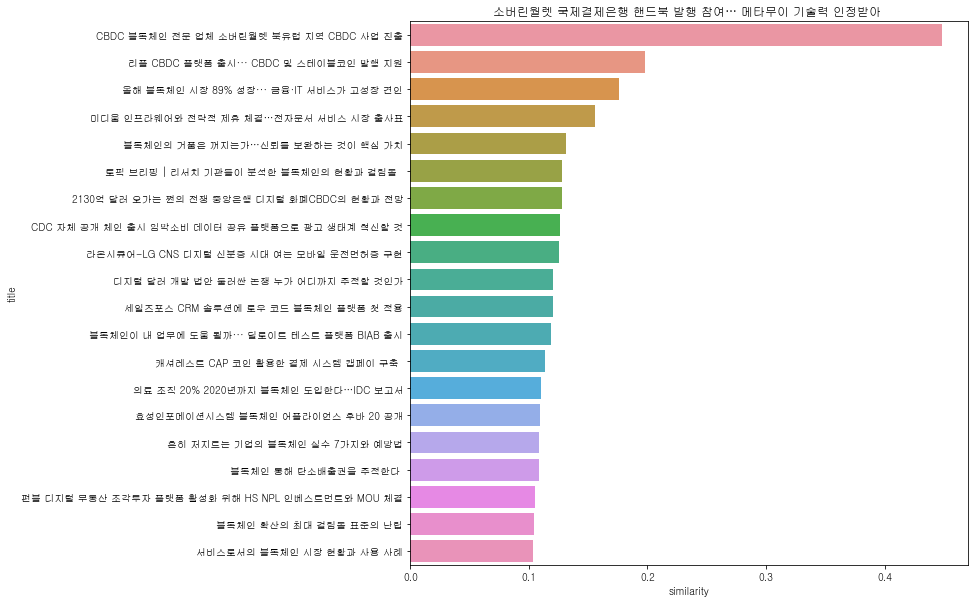

In [267]:
plt.figure(figsize=(10,10))
sns.barplot(data=block_sim_df[:20], x='similarity', y='title')
plt.title(comparison_doc)

## 시각화
- Word2Vec

In [270]:
twitter = Twitter()
twitter.add_dictionary(add_dic, 'Noun')
    
tokenized_data = []
for doc in tqdm(new_df['text']):
    new_doc = re.sub(r'[^가-힣\s]', '', doc) # 한글 외 문자 제거
    tokenized_doc = [noun for noun in twitter.nouns(new_doc) if len(noun) >= 3] # 3글자 미만 제거
    stopwords_removed_doc = [word for word in tokenized_doc if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_doc)

tokenized_data

100%|██████████████████████████████████████████████████████████████████████████████| 1078/1078 [00:49<00:00, 21.86it/s]


[['소버린월렛',
  '북유럽',
  '폴라리스',
  '프로젝트',
  '오프라인',
  '오프라인',
  '소버린월렛',
  '플랫폼',
  '블록체인',
  '동유럽',
  '파일럿',
  '신분증',
  '부동산',
  '등기부',
  '자동차',
  '시스템',
  '파일럿',
  '북유럽',
  '폴라리스',
  '프로젝트',
  '오프라인',
  '보고서',
  '소버린월렛',
  '음으로',
  '지난해',
  '오프라인',
  '솔루션',
  '인사이트',
  '폴라리스',
  '중앙은행',
  '블록체인',
  '프로젝트',
  '방향성',
  '프로젝트',
  '중앙은행',
  '방향성',
  '버린월렛',
  '윤석구',
  '프로토콜',
  '딜레마',
  '인사이트',
  '하드웨어',
  '소프트웨어',
  '오프라인',
  '시스템'],
 ['중앙은행',
  '중앙은행',
  '디지털화폐',
  '엔드투엔드',
  '솔루션',
  '플랫폼',
  '블록체인',
  '플랫폼',
  '사용자',
  '커스터',
  '국내외',
  '프로세스',
  '리스크',
  '플랫폼',
  '중앙은행',
  '서비스',
  '디지털화',
  '수백만',
  '접근성',
  '프라이',
  '테이블',
  '플랫폼',
  '플랫폼',
  '에너지',
  '프라이',
  '중앙은행',
  '디지털',
  '디지털',
  '진다운',
  '디지털',
  '금융기관',
  '사용자',
  '디지털',
  '사용자',
  '디지털',
  '서비스',
  '오프라인',
  '스마트폰',
  '중앙은행',
  '제임스',
  '플랫폼',
  '중앙은행',
  '플랫폼',
  '사용자',
  '디지털',
  '디지털',
  '홍콩달러',
  '프로그램',
  '부동산',
  '솔루션',
  '이해관계자'],
 ['스위스',
  '디지털',
  '커스터',
  '비즈니스',
  '커스터',
  '솔루션',
  '엔터프라이즈',
  '솔루션',
  '시너지',


In [290]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, 
                 vector_size = 300,   # 벡터스페이스 차원
                 window = 5,          # 분석할 단어 범위   
                 min_count = 200,       # 등장횟수가 10 미만인 단어는 무시
                 workers = 4,         # CPU 사용 조건. 모델 생성시 사용할 스레드 개수
                # batch_words=500,     # 사전 구축 시 한번에 읽는 단어수
                #  iter=100,            # 학습 반복횟수
                 sg = 1)              # 0: CBOW, 1: Skip-gram

In [301]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(71, 300)

In [312]:
document_vectors = model.wv.vectors

In [313]:
from sklearn.cluster import KMeans

# Perform k-means clustering
num_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(document_vectors)
cluster_labels = kmeans.labels_

cluster_labels

array([0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0,
       1, 1, 2, 1, 2])

In [300]:
# '블록체인'와 유사한 단어 조회
print(model.wv.most_similar("블록체인"))

[('공급망', 0.8117254972457886), ('가트너', 0.7635283470153809), ('스마트', 0.7553772330284119), ('온라인', 0.7497703433036804), ('비트코인', 0.7300388216972351), ('인터넷', 0.7026119828224182), ('생태계', 0.6527089476585388), ('디지털', 0.6483678221702576), ('프로젝트', 0.6314867734909058), ('실시간', 0.6220554709434509)]


In [293]:
model.wv['블록체인']

array([ 7.75657892e-02, -2.74892920e-03, -2.78313845e-01,  5.00369035e-02,
        4.65117861e-03,  5.69505244e-02, -1.25544339e-01, -1.92529127e-01,
       -6.74019158e-02, -3.40120494e-02,  1.09305367e-01,  7.68213943e-02,
       -4.21885140e-02,  6.82857558e-02, -5.97700961e-02,  1.51819825e-01,
        7.74610341e-02, -9.16241556e-02,  1.07818775e-01, -2.82582529e-02,
       -2.06948854e-02, -2.94147078e-02, -9.29843709e-02, -7.41561949e-02,
        1.46921307e-01, -9.49215963e-02, -1.32562861e-01,  9.01424065e-02,
        2.22009122e-02, -1.31533548e-01,  4.09738779e-01, -4.84031029e-02,
        1.96617410e-01,  1.02871515e-01, -1.60184667e-01,  6.96352497e-02,
        2.11860970e-01, -1.26400530e-01,  6.57043085e-02, -1.09094717e-01,
        3.22504677e-02, -7.57260844e-02,  2.62044668e-01, -2.23086789e-01,
        8.89329612e-02,  5.30290417e-02, -1.22831754e-01,  4.78488952e-02,
        1.96123078e-01,  2.08601411e-02,  1.47164360e-01,  1.54998600e-01,
       -1.64775774e-01,  

In [302]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

# pip install gensim==3.8.1

In [310]:
# solution에 대해 가장 유사한 단어 5개 추출
most_sim_words = [i[0] for i in model.wv.most_similar(positive='블록체인', topn=10)]
most_sim_words.append('블록체인')
most_sim_words

['공급망',
 '가트너',
 '스마트',
 '온라인',
 '비트코인',
 '인터넷',
 '생태계',
 '디지털',
 '프로젝트',
 '실시간',
 '블록체인']

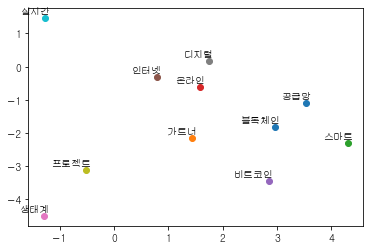

In [321]:
for word in most_sim_words:
    i = labels.index(word)
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

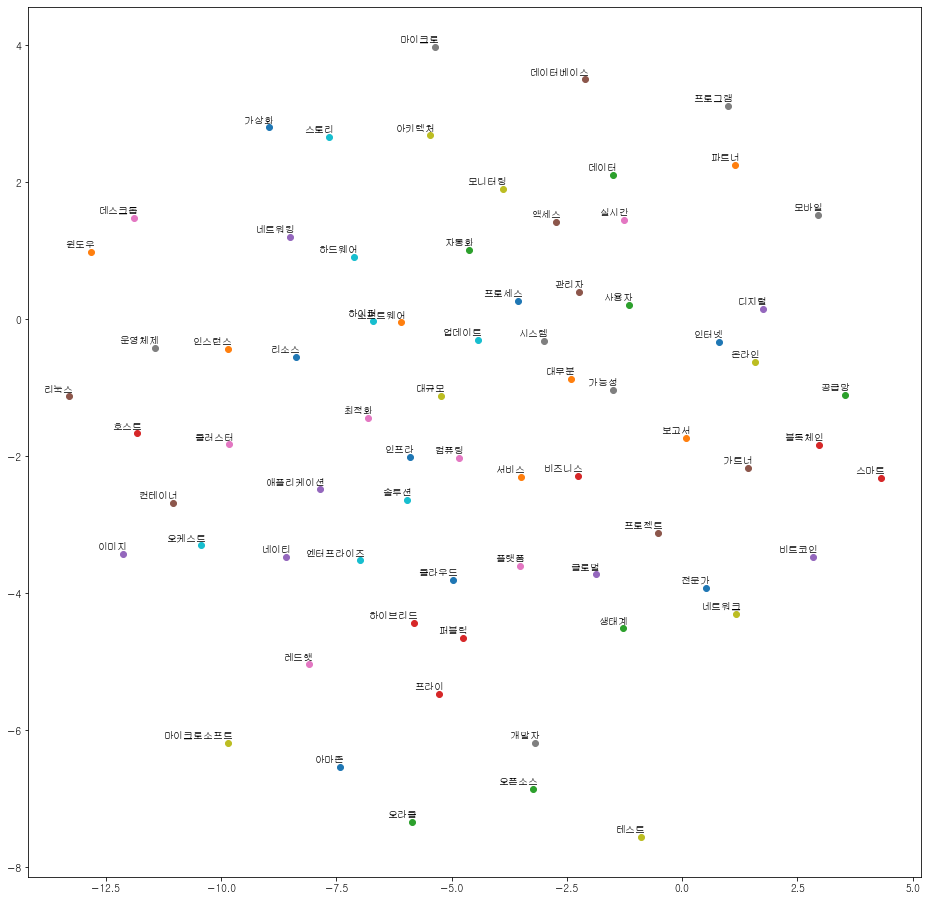

In [319]:
labels = [i for i in model.wv.key_to_index]
tokens = model.wv[labels]
tsne_model = TSNE(n_components=2, random_state=23)
new_values = tsne_model.fit_transform(tokens)

x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(16, 16)) 
for i in range(new_values.shape[0]):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i], y[i]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

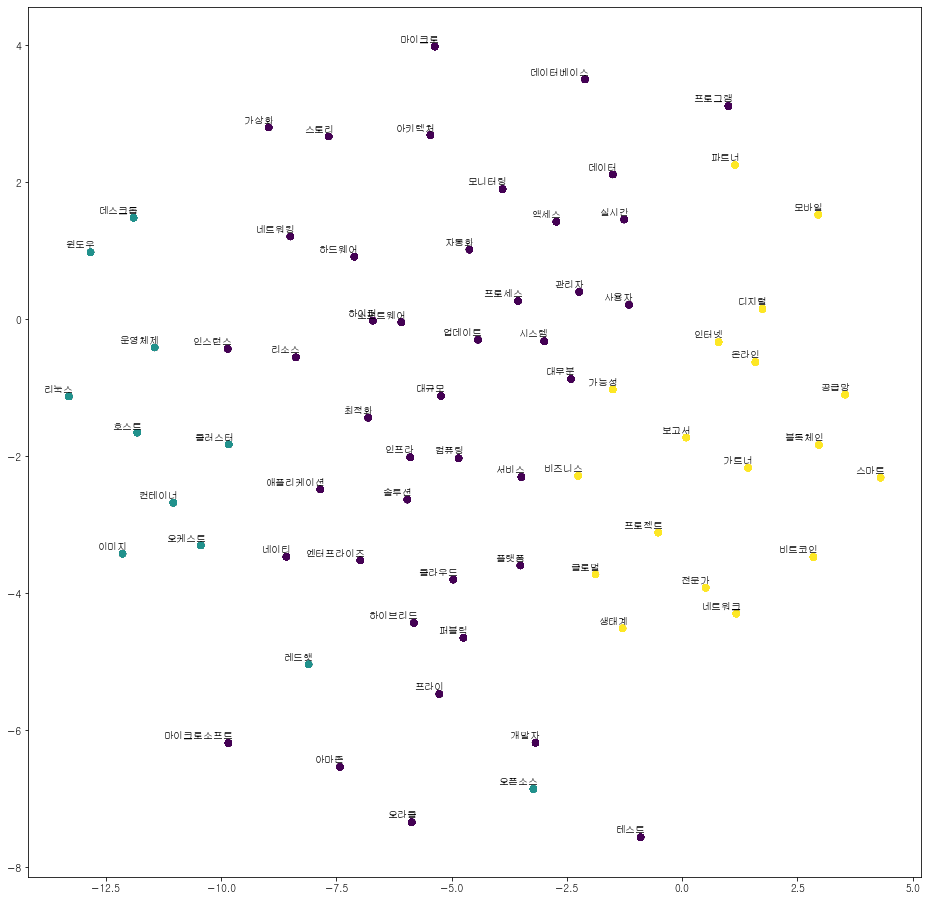

In [320]:
def tsne_plot(model):
    import warnings

    # 경고메세지 끄기
    warnings.filterwarnings(action='ignore')
    
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)
        
    tsne = TSNE(n_components=2, random_state=23)
    document_vectors_2d = tsne.fit_transform(document_vectors)

    x = []
    y = []
    for value in document_vectors_2d:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.rcParams['font.family'] = 'Gulim'
        plt.scatter(document_vectors_2d[:, 0], document_vectors_2d[:, 1], c=cluster_labels)
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    
tsne_plot(model)